Sveučilište u Zagrebu  
Fakultet elektrotehnike i računarstva  
  
## Strojno učenje 1 2023/2024  
http://www.fer.unizg.hr/predmet/struce1

------------------------------

### Prva laboratorijska vježba: Linearna regresija

*Verzija: 1.0
Zadnji put ažurirano: 1. 10. 2021.*

(c) 2015-2023 Jan Šnajder, Domagoj Alagić 

Rok za predaju: **22. listopada 2023. u 23:59h**

------------------------------

### Pravila predaje
Predajom vježbe potvrđujete sljedeće točke:
1. Niste od drugoga primili pomoć pri rješavanju vježbe;
2. Atribuirali ste dijelove koda koji su preuzeti s interneta referencirajući ih u komentarima;
3. Niste koristili dijelove koda s interneta koji su specifični za laboratorijsku vježbu;
4. Niste koristili UI-asistente za kodiranje kao npr. GitHub Copilot (uključivo alate generativne UI, kao što je ChatGPT).

**Povreda bilo kojeg od gornjih pravila smatra se prekršajem te povlači akademske sankcije.**

## Upute

Prva laboratorijska vježba sastoji se od sedam zadataka. U nastavku slijedite upute navedene u ćelijama s tekstom. Rješavanje vježbe svodi se na **dopunjavanje ove bilježnice**: umetanja ćelije ili više njih **ispod** teksta zadatka, pisanja odgovarajućeg kôda te evaluiranja ćelija. 

Osigurajte da u potpunosti **razumijete** kôd koji ste napisali. Kod predaje vježbe, morate biti u stanju na zahtjev asistenta (ili demonstratora) preinačiti i ponovno evaluirati Vaš kôd. Nadalje, morate razumjeti teorijske osnove onoga što radite, u okvirima onoga što smo obradili na predavanju. Ispod nekih zadataka možete naći i pitanja koja služe kao smjernice za bolje razumijevanje gradiva (**nemojte pisati** odgovore na pitanja u bilježnicu). Stoga se nemojte ograničiti samo na to da riješite zadatak, nego slobodno eksperimentirajte. To upravo i jest svrha ovih vježbi.

Vježbe trebate raditi **samostalno**. Možete se konzultirati s drugima o načelnom načinu rješavanja, ali u konačnici morate sami odraditi vježbu. U protivnome vježba nema smisla.

In [1]:
# Učitaj osnovne biblioteke...
import numpy as np
import sklearn
import matplotlib.pyplot as plt
%pylab inline

%pylab is deprecated, use %matplotlib inline and import the required libraries.
Populating the interactive namespace from numpy and matplotlib


### 1. Jednostavna regresija

Zadan je skup primjera $\mathcal{D}=\{(x^{(i)},y^{(i)})\}_{i=1}^4 = \{(0,4),(1,1),(2,2),(4,5)\}$. Primjere predstavite matricom $\mathbf{X}$ dimenzija $N\times n$ (u ovom slučaju $4\times 1$) i vektorom oznaka $\textbf{y}$, dimenzija $N\times 1$ (u ovom slučaju $4\times 1$), na sljedeći način:


In [2]:
X = np.array([[0],[1],[2],[4]])
y = np.array([4,1,2,5])

### (a)

Proučite funkciju [`PolynomialFeatures`](http://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.PolynomialFeatures.html) iz biblioteke `sklearn` i upotrijebite je za generiranje matrice dizajna $\mathbf{\Phi}$ koja ne koristi preslikavanje u prostor više dimenzije (samo će svakom primjeru biti dodane *dummy* jedinice; $m=n+1$).


In [3]:
from sklearn.preprocessing import PolynomialFeatures
# Vaš kôd ovdje
poly = PolynomialFeatures(degree=1)
# poly.fit(X)
# phi = poly.transform(X)
phi = poly.fit_transform(X)
phi

array([[1., 0.],
       [1., 1.],
       [1., 2.],
       [1., 4.]])

### (b)

Upoznajte se s modulom [`linalg`](http://docs.scipy.org/doc/numpy/reference/routines.linalg.html). Izračunajte težine $\mathbf{w}$ modela linearne regresije kao $\mathbf{w}=(\mathbf{\Phi}^\intercal\mathbf{\Phi})^{-1}\mathbf{\Phi}^\intercal\mathbf{y}$. Zatim se uvjerite da isti rezultat možete dobiti izračunom pseudoinverza $\mathbf{\Phi}^+$ matrice dizajna, tj. $\mathbf{w}=\mathbf{\Phi}^+\mathbf{y}$, korištenjem funkcije [`pinv`](http://docs.scipy.org/doc/numpy/reference/generated/numpy.linalg.pinv.html).

In [4]:
from numpy import linalg
# Vaš kôd ovdje
w = np.linalg.inv(phi.T @ phi) @ phi.T @ y
pseudo_inv = np.linalg.pinv(phi)
w_pseudo_inv = pseudo_inv.dot(y)
print("w:", w, "\nw_pseudo_inv:", w_pseudo_inv)

w: [2.2        0.45714286] 
w_pseudo_inv: [2.2        0.45714286]


Radi jasnoće, u nastavku je vektor $\mathbf{x}$ s dodanom *dummy* jedinicom $x_0=1$ označen kao $\tilde{\mathbf{x}}$.

### (c)

Prikažite primjere iz $\mathcal{D}$ i funkciju $h(\tilde{\mathbf{x}})=\mathbf{w}^\intercal\tilde{\mathbf{x}}$. Izračunajte pogrešku učenja prema izrazu $E(h|\mathcal{D})=\frac{1}{2}\sum_{i=1}^N(\tilde{\mathbf{y}}^{(i)} - h(\tilde{\mathbf{x}}^{(i)}))^2$. Možete koristiti funkciju srednje kvadratne pogreške [`mean_squared_error`]( http://scikit-learn.org/stable/modules/generated/sklearn.metrics.mean_squared_error.html) iz modula [`sklearn.metrics`](http://scikit-learn.org/stable/modules/classes.html#module-sklearn.metrics).

**Q:** Gore definirana funkcija pogreške $E(h|\mathcal{D})$ i funkcija srednje kvadratne pogreške nisu posve identične. U čemu je razlika? Koja je "realnija"?

Realnija je funkcija srednje kvadratne pogreške, razlika je što funkcija pogreške $E(h|\mathcal{D})$ množi sumu kvadrata pogrešaka s 1/2, a funkcija srednje kvadratne pogreške množi s 1/N. Realnija je funkcija srednje kvadratne pogreške upravo zbog toga što se množi s 1/N (dobijemo zapravo srednju kvadratnu pogrešku).

In [5]:
from sklearn.metrics import mean_squared_error
# Vaš kôd ovdje
print([p for p in zip(phi, y)])

[(array([1., 0.]), 4), (array([1., 1.]), 1), (array([1., 2.]), 2), (array([1., 4.]), 5)]


In [6]:
h = phi @ w
h

array([2.2       , 2.65714286, 3.11428571, 4.02857143])

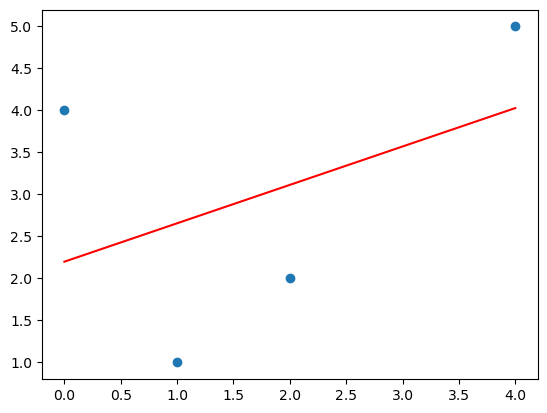

In [7]:
plt.scatter(X, y)
plt.plot(X, h, color='red')

In [8]:
E = 1 / 2 * np.sum((y - h)**2)
E

4.085714285714285

In [9]:
MSE = mean_squared_error(y_true=y, y_pred=h, squared=True) # 1 / (N) *...
MSE

2.0428571428571427

### (d)

Uvjerite se da za primjere iz $\mathcal{D}$ težine $\mathbf{w}$ ne možemo naći rješavanjem sustava $\mathbf{w}=\mathbf{\Phi}^{-1}\mathbf{y}$, već da nam doista treba pseudoinverz.

**Q:** Zašto je to slučaj? Bi li se problem mogao riješiti preslikavanjem primjera u višu dimenziju? Ako da, bi li to uvijek funkcioniralo, neovisno o skupu primjera $\mathcal{D}$? Pokažite na primjeru.
$\newline$**A:** 
1. Zbog toga što matrica nije kvadratna, odnosno broj redaka je veći od broj stupaca (N > m + 1) -> matrica nema puni rang -> matrica je singularna -> nema inverz.
2. Uvijek bi mogli rješiti problem preslikavanjem primjera u višu dimenziju, ali problem kod toga jest da bi onda imali prekompleksan model koji bi se prenaučio na podatcima za učenje i loše generalizirao na neviđenim podatcima.

In [10]:
# Vaš kôd ovdje
X.shape # N != m + 1
#w = np.linalg.inv(X) @ y
# LinAlgError: Last 2 dimensions of the array must be square

(4, 1)

In [11]:
poly = PolynomialFeatures(degree=3, include_bias=True)
phi_3 = poly.fit_transform(X)
phi_3.shape

(4, 4)

In [12]:
w = np.linalg.inv(phi_3) @ y
w

array([ 4.        , -5.91666667,  3.375     , -0.45833333])

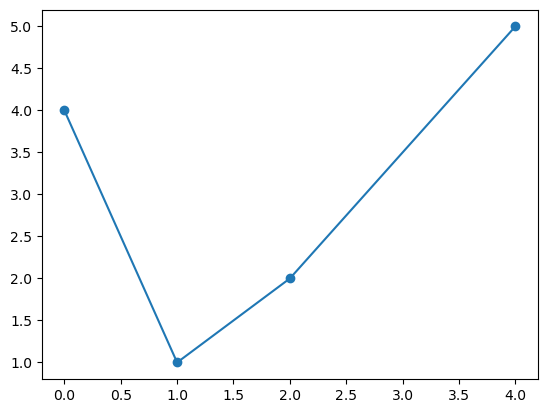

In [13]:
h = phi_3 @ w
plt.plot(X, h)
plt.scatter(X, y)

### (e) 

Proučite klasu [`LinearRegression`](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html) iz modula [`sklearn.linear_model`](http://scikit-learn.org/stable/modules/classes.html#module-sklearn.linear_model). Provjerite jesu li težine koje izračunava ta funkcija (dostupne pomoću atributa `coef_` i `intercept_`) jednake onima koje ste izračunali gore. Ako nisu, prilagodite kôd tako da jest.

**NB:** Obratite pozornost na to kako klase [`LinearRegression`](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html) i [`PolynomialFeatures`](http://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.PolynomialFeatures.html) koriste pomak i osigurajte da ga ne dodajete više puta.

Izračunajte predikcije modela (metoda `predict`) i uvjerite se da je pogreška učenja identična onoj koju ste ranije izračunali.

In [14]:
from sklearn.linear_model import LinearRegression
# Vaš kôd ovdje
lin_reg = LinearRegression(fit_intercept=True).fit(X, y)

In [15]:
print(lin_reg.intercept_, lin_reg.coef_) # tezine w0,w1 izgledaju isto kao i u (b)
print(lin_reg.predict(X)) # isti rezultati kao i u (c)
print(mean_squared_error(lin_reg.predict(X), y))

2.2 [0.45714286]
[2.2        2.65714286 3.11428571 4.02857143]
2.042857142857143


In [16]:
lin_reg3 = LinearRegression(fit_intercept=True).fit(phi_3, y)

In [17]:
print(lin_reg3.intercept_, lin_reg3.coef_) # tezine iste kao i u (d)
print(lin_reg3.predict(phi_3))
print(mean_squared_error(lin_reg3.predict(phi_3), y))

4.0000000000000036 [ 0.         -5.91666667  3.375      -0.45833333]
[4. 1. 2. 5.]
1.7899253939464758e-27


### 2. Polinomijalna regresija i utjecaj šuma

### (a)

Razmotrimo sada regresiju na većem broju primjera. Definirajte funkciju `make_labels(X, f, noise=0)` koja uzima matricu neoznačenih primjera $\mathbf{X}_{N\times n}$ te generira vektor njihovih oznaka $\mathbf{y}_{N\times 1}$. Oznake se generiraju kao $y^{(i)} = f(x^{(i)})+\mathcal{N}(0,\sigma^2)$, gdje je $f:\mathbb{R}^n\to\mathbb{R}$ stvarna funkcija koja je generirala podatke (koja nam je u stvarnosti nepoznata), a $\sigma$ je standardna devijacija Gaussovog šuma, definirana parametrom `noise`. Za generiranje šuma možete koristiti funkciju [`numpy.random.normal`](https://numpy.org/doc/stable/reference/random/generated/numpy.random.normal.html). 

Generirajte skup za učenje od $N=50$ primjera uniformno distribuiranih u intervalu $[-5,5]$ pomoću funkcije $f(x) = 5 + x -2 x^2 -5 x^3$ uz šum  $\sigma=200$:

In [18]:
from numpy.random import normal
# https://www.w3schools.com/python/python_lambda.asp
f = lambda X: 5 + X - 2 * X**2 - 5 * X**3

def make_labels(X, f, noise=0):
    # Vaš kôd ovdje
    return f(X) + np.random.normal(loc=0, scale=noise, size=X.shape)

In [19]:
def make_instances(x1, x2, N) :
    return np.array([np.array([x]) for x in np.linspace(x1,x2,N)])

In [20]:
# Vaš kôd ovdje
#np.linspace() - Return evenly spaced numbers over a specified interval.
N = 50
X2b = make_instances(-5, 5, N)
X2b.shape

(50, 1)

In [21]:
y2b = make_labels(X2b, f, 200)

Prikažite taj skup funkcijom [`scatter`](http://matplotlib.org/api/pyplot_api.html#matplotlib.pyplot.scatter).

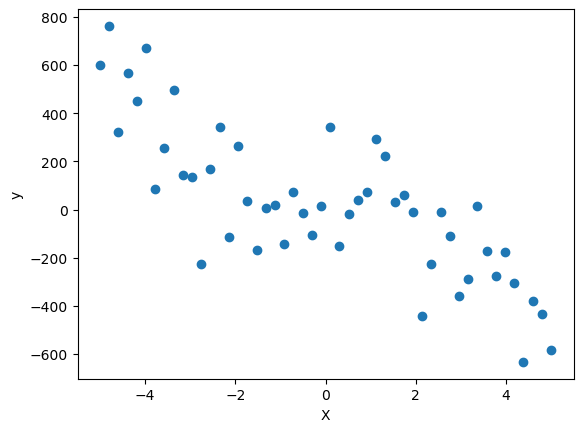

In [22]:
# Vaš kôd ovdje
plt.xlabel('X')
plt.ylabel('y')
plt.scatter(X2b, y2b)

### (b)

Trenirajte model polinomijalne regresije stupnja $d=3$. Na istom grafikonu prikažite naučeni model $h(\mathbf{x})=\mathbf{w}^\intercal\tilde{\mathbf{x}}$ i primjere za učenje. Izračunajte pogrešku učenja modela.

In [23]:
# Vaš kôd ovdje
poly = PolynomialFeatures(degree=3, include_bias=True)
phi3 = poly.fit_transform(X2b)

In [24]:
lin_reg3 = LinearRegression().fit(phi3, y2b)
print(lin_reg3.intercept_, lin_reg3.coef_)

[8.4736117] [[ 0.         -6.09487142  1.67401644 -4.8693676 ]]


In [25]:
h3 = lin_reg3.predict(phi3)

In [26]:
print(mean_squared_error(y_true=y2b, y_pred=h3))

27119.393520237063


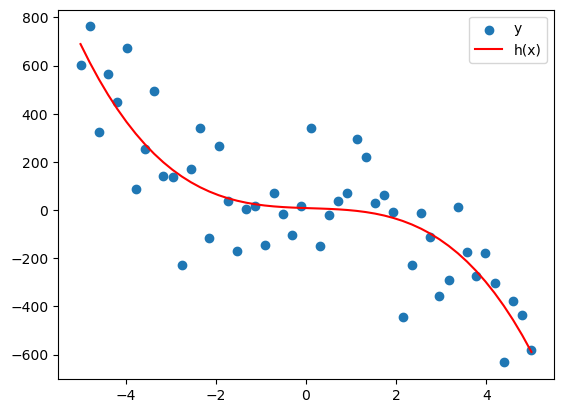

In [27]:
plt.scatter(X2b, y2b, label='y')
plt.plot(X2b, h3, label='h(x)', color='red')
plt.legend()
plt.show()

### 3. Odabir modela

### (a)

Na skupu podataka iz zadatka 2 trenirajte pet modela linearne regresije $\mathcal{H}_d$ različite složenosti, gdje je $d$ stupanj polinoma, $d\in\{1,3,5,10,20\}$. Prikažite na istome grafikonu skup za učenje i funkcije $h_d(\mathbf{x})$ za svih pet modela (preporučujemo koristiti `plot` unutar `for` petlje). Izračunajte pogrešku učenja svakog od modela.

**Q:** Koji model ima najmanju pogrešku učenja i zašto?
$\newline$**A:** Najmanju pogrešku učenja ima model najvećeg stupnja polinoma.

Greška polinoma 1. stupnja: 36793.78684038152
Greška polinoma 3. stupnja: 27119.393520237063
Greška polinoma 5. stupnja: 26443.662989225388
Greška polinoma 10. stupnja: 24173.674957529878
Greška polinoma 20. stupnja: 18168.616823954606


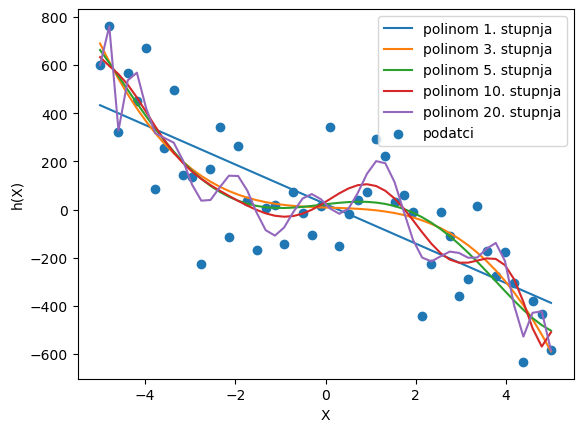

In [28]:
# Vaš kôd ovdje
degree_of_polynomial = [1, 3, 5, 10, 20]

for d in degree_of_polynomial:
    poly = PolynomialFeatures(degree=d, include_bias=True)
    phi = poly.fit_transform(X2b)
    lin_reg = LinearRegression().fit(phi, y2b)
    h = lin_reg.predict(phi)
    MSE = mean_squared_error(y_true=y2b, y_pred=h)
    plt.xlabel('X')
    plt.ylabel('h(X)')
    plt.plot(X2b, h, label='polinom ' + str(d) + '. stupnja')
    print('Greška polinoma ' + str(d) + '. stupnja:', MSE)
plt.scatter(X2b, y2b, label='podatci')
plt.legend()

### (b)

Razdvojite skup primjera iz zadatka 2 pomoću funkcije [`model_selection.train_test_split`](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html) na skup za učenja i skup za ispitivanje u omjeru 1:1. Prikažite na jednom grafikonu pogrešku učenja i ispitnu pogrešku za modele polinomijalne regresije $\mathcal{H}_d$, sa stupnjem polinoma $d$ u rasponu $d\in [1,2,\ldots,20]$. Budući da kvadratna pogreška brzo raste za veće stupnjeve polinoma, umjesto da iscrtate izravno iznose pogrešaka, iscrtajte njihove logaritme.

**NB:** Podjela na skupa za učenje i skup za ispitivanje mora za svih dvadeset modela biti identična.

**Q:** Je li rezultat u skladu s očekivanjima? Koji biste model odabrali i zašto?
$\newline$
**A:** Ne uvijek, s obzirom da imamo mal broj podataka, ponekad se može dogoditi da model odabere podskup podataka koji je reprezentativan za taj cijeli skup. Odnosno, skup podataka na kojem je model treniran može biti reprezentativan za cijeli skup tako da kada testiramo na skupu podataka za testiranje imamo manju pogrešku s nekim složenijim modelima nego s nekim manje složenim modelima. 

**Q:** Pokrenite iscrtavanje više puta. U čemu je problem? Bi li problem bio jednako izražen kad bismo imali više primjera? Zašto?
$\newline$ 
**A:** Ne, kada bi imali veći broj primjera, pogreška na skupu podataka za testiranje bi monotono rasla sa složenošću modela. 

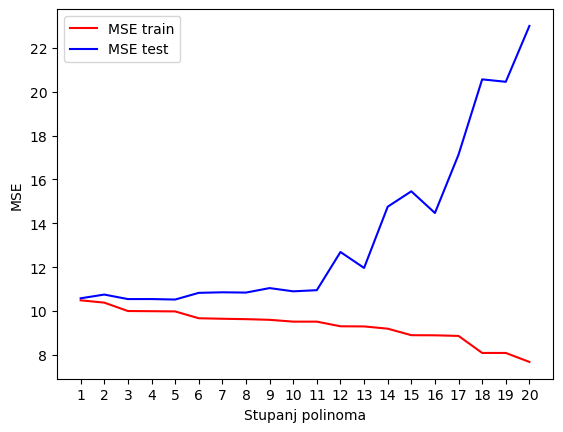

In [29]:
from sklearn.model_selection import train_test_split
# Vaš kôd ovdje
X3b_train, X3b_test, y3b_train, y3b_test = train_test_split(X2b, y2b, test_size=0.5, train_size=0.5, random_state=42)

degrees = np.arange(1, 21, 1)
MSE_train, MSE_test = [], []

for d in degrees:
    poly = PolynomialFeatures(degree=d, include_bias=True)
    phi_train = poly.fit_transform(X3b_train)
    phi_test = poly.fit_transform(X3b_test)
    lin_reg = LinearRegression().fit(phi_train, y3b_train)
    h_train = lin_reg.predict(phi_train)
    h_test = lin_reg.predict(phi_test)
    MSE_train.append(mean_squared_error(y_true=y3b_train, y_pred=h_train))
    MSE_test.append(mean_squared_error(y_true=y3b_test, y_pred=h_test))
    
plt.plot(degrees, np.log(MSE_train), label='MSE train', color='red')
plt.plot(degrees, np.log(MSE_test), label='MSE test', color='blue')
plt.xlabel('Stupanj polinoma')
plt.ylabel('MSE')
plt.legend()
plt.xlim(0, 21) # https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.xlim.html
plt.xticks(degrees) # https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.xticks.html
plt.show()

### (c)

Točnost modela ovisi o (1) njegovoj složenosti (stupanj $d$ polinoma), (2) broju primjera $N$, i (3) količini šuma. Kako biste to analizirali, nacrtajte grafikone pogrešaka kao u 3b, ali za različit $N\in$ (trećina, dvije trećine, sve) i količine šuma $\sigma\in\{100,200,500\}$ (ukupno 9 grafikona). Upotrijebite funkciju [`subplots`](http://matplotlib.org/examples/pylab_examples/subplots_demo.html) kako biste pregledno posložili grafikone u tablicu $3\times 3$. Podatci se generiraju na isti način kao u zadatku 2.

**NB:** Pobrinite se da svi grafikoni budu generirani nad usporedivim skupovima podataka, na sljedeći način. Generirajte najprije svih 1000 primjera, podijelite ih na skupove za učenje i skupove za ispitivanje (dva skupa od po 500 primjera). Zatim i od skupa za učenje i od skupa za ispitivanje načinite tri različite verzije, svaka s drugačijom količinom šuma (ukupno 2x3=6 verzija podataka). Kako bi simulirali veličinu skupa podataka, od tih dobivenih 6 skupova podataka uzorkujte trećinu, dvije trećine i sve podatke. Time ste dobili 18 skupova podataka -- skup za učenje i za testiranje za svaki od devet grafova.

In [30]:
# Vaš kôd ovdje
N = 1000
x1, x2 = -5, 5
X3c = make_instances(x1, x2, N)
y3c = make_labels(X3c, f, 0) # bez suma
X_train, X_test, y_train, y_test = train_test_split(X3c, y3c, test_size=0.5, random_state=42)

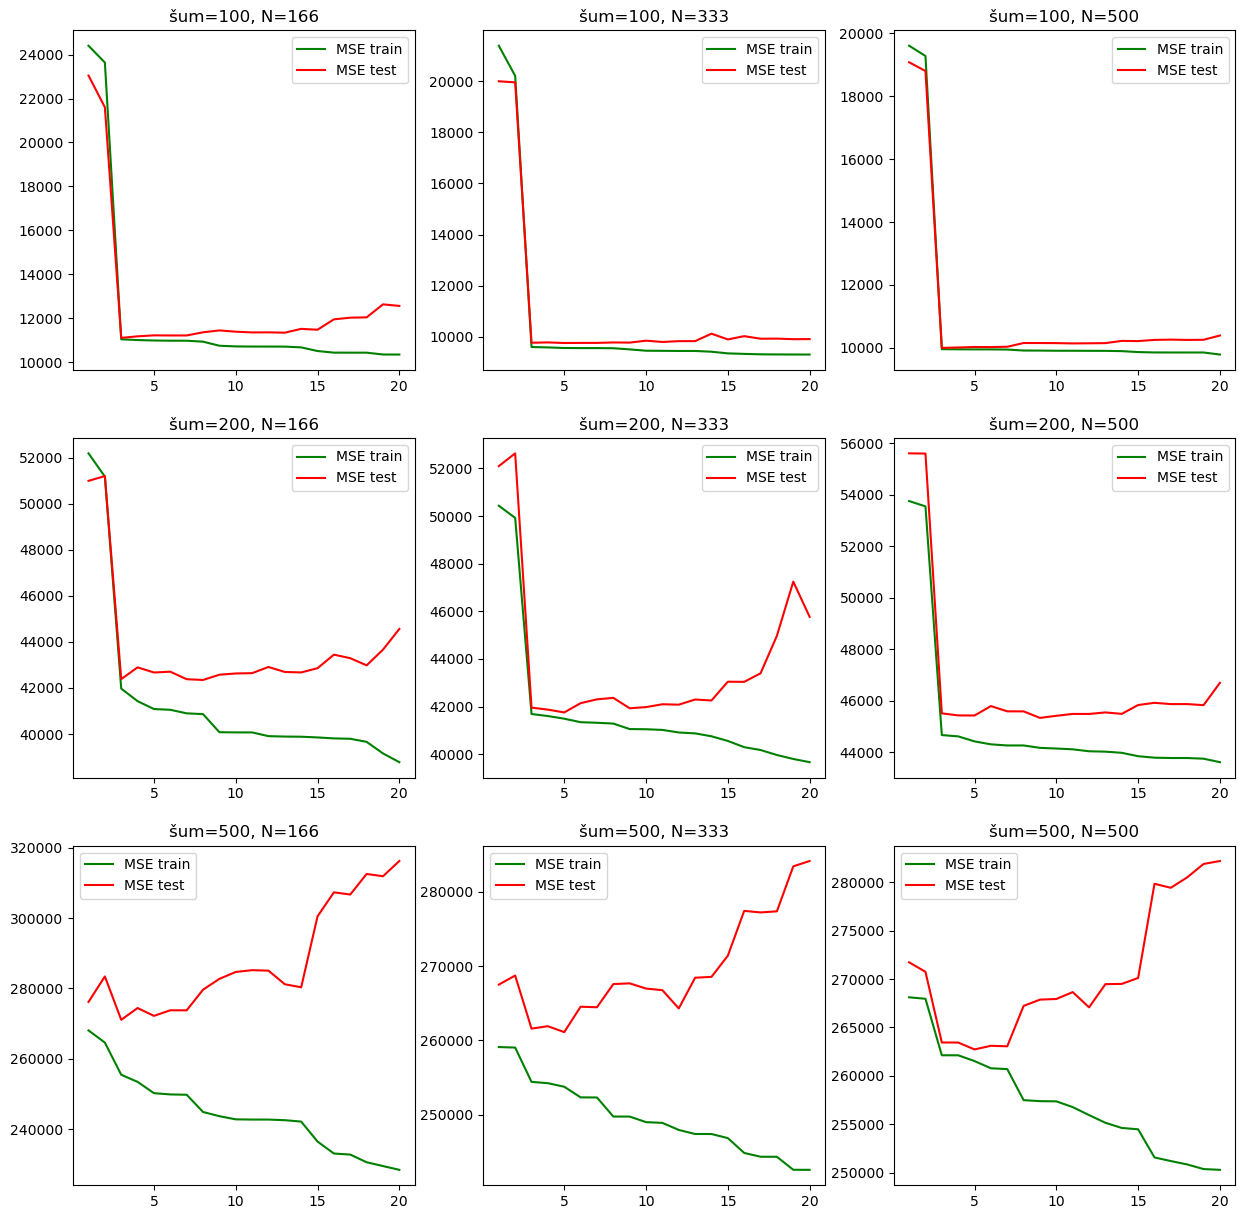

In [31]:
sigmas = [100, 200, 500]
perc_of_N = [1/3, 2/3, 1]

#https://matplotlib.org/stable/gallery/subplots_axes_and_figures/subplots_demo.html
fig, axs = plt.subplots(3, 3, figsize=(15, 15)) # https://stackoverflow.com/questions/14770735/how-do-i-change-the-figure-size-with-subplots
row, column = 0, 0

for sigma in sigmas:
    noise = np.random.normal(loc=0, scale=sigma, size=(int(N / 2), 1))
    y_train_noise = y_train + noise
    y_test_noise = y_test + noise
    for perc in perc_of_N:
        MSE_train, MSE_test = [], []
        for d in degrees:
            poly = PolynomialFeatures(degree=d, include_bias=True)
            phi_train = poly.fit_transform(X_train)
            phi_test = poly.fit_transform(X_test)
            currN = int((N / 2) * perc)
            y_train_noise_subset = y_train_noise[:currN]
            y_test_noise_subset = y_test_noise[:currN]
            phi_train_subset = phi_train[:currN]
            phi_test_subset = phi_test[:currN]
            lin_reg = LinearRegression().fit(phi_train_subset, y_train_noise_subset)
            h_train_subset = lin_reg.predict(phi_train_subset)
            h_test_subset = lin_reg.predict(phi_test_subset)
            MSE_train.append(mean_squared_error(y_true=y_train_noise_subset, y_pred=h_train_subset))
            MSE_test.append(mean_squared_error(y_true=y_test_noise_subset, y_pred=h_test_subset))
        axs[row, column].set_title('šum=' + str(sigma) + ', N=' + str(int(N / 2 * perc)))
        axs[row, column].plot(degrees, MSE_train, color='green', label='MSE train')
        axs[row, column].plot(degrees, MSE_test, color='red', label='MSE test')
        axs[row, column].legend()

        column = (column + 1) % 3
    row += 1 
plt.show()

***Q:*** Jesu li rezultati očekivani? Obrazložite.
$\newline$
***A:*** Da, jesu, vidimo da povećanjem šuma pogreška modela raste zato što je teško naučiti strukturu podataka (ili prenaučiti šumovite podatke tj. šum u podatcima) s velikom količinom šuma što onda rezultira i većom pogreškom za testiranje. Suprotni slučaj tome je kada podatci imaju malu količinu šuma, model lakše uči strukturu podataka.

### 4. Regularizirana regresija

### (a)

U gornjim eksperimentima nismo koristili **regularizaciju**. Vratimo se najprije na primjer iz zadatka 1. Na primjerima iz tog zadatka izračunajte težine $\mathbf{w}$ za polinomijalni regresijski model stupnja $d=3$ uz L2-regularizaciju (tzv. *ridge regression*), prema izrazu $\mathbf{w}=(\mathbf{\Phi}^\intercal\mathbf{\Phi}+\lambda\mathbf{I})^{-1}\mathbf{\Phi}^\intercal\mathbf{y}$. Napravite izračun težina za regularizacijske faktore $\lambda=0$, $\lambda=1$ i $\lambda=10$ te usporedite dobivene težine.

**Q:** Kojih je dimenzija matrica koju treba invertirati?
$\newline$
**A:** 4x4

**Q:** Po čemu se razlikuju dobivene težine i je li ta razlika očekivana? Obrazložite.
$\newline$
**A:** Vidimo da su težine koje su asocirane značajke višeg stupnja smanjene, odnosno, L2 regresija ih priteže na manju vrijednost kako bi spriječila prenaučenost.

In [32]:
# Vaš kôd ovdje
phi = PolynomialFeatures(degree=3, include_bias=True).fit_transform(X)
lambdas = [0, 1, 10]

for l in lambdas:
    I = np.diag(np.ones(4))
    I[0, 0] = 0
    w = np.linalg.inv(phi.T @ phi + l * I) @ phi.T @ y
    print("lambda=", l, "w=", w)


lambda= 0 w= [ 4.         -5.91666667  3.375      -0.45833333]
lambda= 1 w= [ 3.05696145 -0.69079365 -0.2831746   0.1445805 ]
lambda= 10 w= [ 2.49444184 -0.15897295 -0.13423067  0.0815601 ]


### (b)

Proučite klasu [`Ridge`](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Ridge.html#sklearn.linear_model.Ridge) iz modula [`sklearn.linear_model`](http://scikit-learn.org/stable/modules/classes.html#module-sklearn.linear_model), koja implementira L2-regularizirani regresijski model. Parametar $\alpha$ odgovara parametru $\lambda$. Primijenite model na istim primjerima kao u prethodnom zadatku i ispišite težine $\mathbf{w}$ (atributi `coef_` i `intercept_`). Ponovno, pripazite na pomak.

**Q:** Jesu li težine identične onima iz zadatka 4a? Ako nisu, objasnite zašto je to tako i kako biste to popravili.

In [33]:
from sklearn.linear_model import Ridge
# Vaš kôd ovdje
for l in lambdas:
    ridge_reg = Ridge(alpha=l).fit(phi, y)
    print("lambda=", l, "w=", ridge_reg.intercept_, ridge_reg.coef_)

lambda= 0 w= 4.000000000000025 [ 0.         -5.91666667  3.375      -0.45833333]
lambda= 1 w= 3.0569614512471652 [ 0.         -0.69079365 -0.2831746   0.1445805 ]
lambda= 10 w= 2.4944418431229733 [ 0.         -0.15897295 -0.13423067  0.0815601 ]


### (c)

Vratimo se na slučaj $N=50$ slučajno generiranih primjera iz zadatka 2. Trenirajte modele polinomijalne regresije $\mathcal{H}_{\lambda,d}$ za $\lambda\in\{0,100\}$ i $d\in\{2,10\}$ (ukupno četiri modela). Skicirajte pripadne funkcije $h(\mathbf{x})$ i primjere (na jednom grafikonu; preporučujemo koristiti `plot` unutar `for` petlje).

**Q:** Jesu li rezultati očekivani? Obrazložite.
$\newline$
**A:** Možemo primjetiti kako za veliku vrijednost lambde (=100) kod polinoma 10-og stupnja zakrivljenja su glađa, za razliku od modela 2-og stupnja. Razlog tome je zato što regularizirana regresija "kažnjava" složenije modele tako što im smanjuje vrijednosti težina.

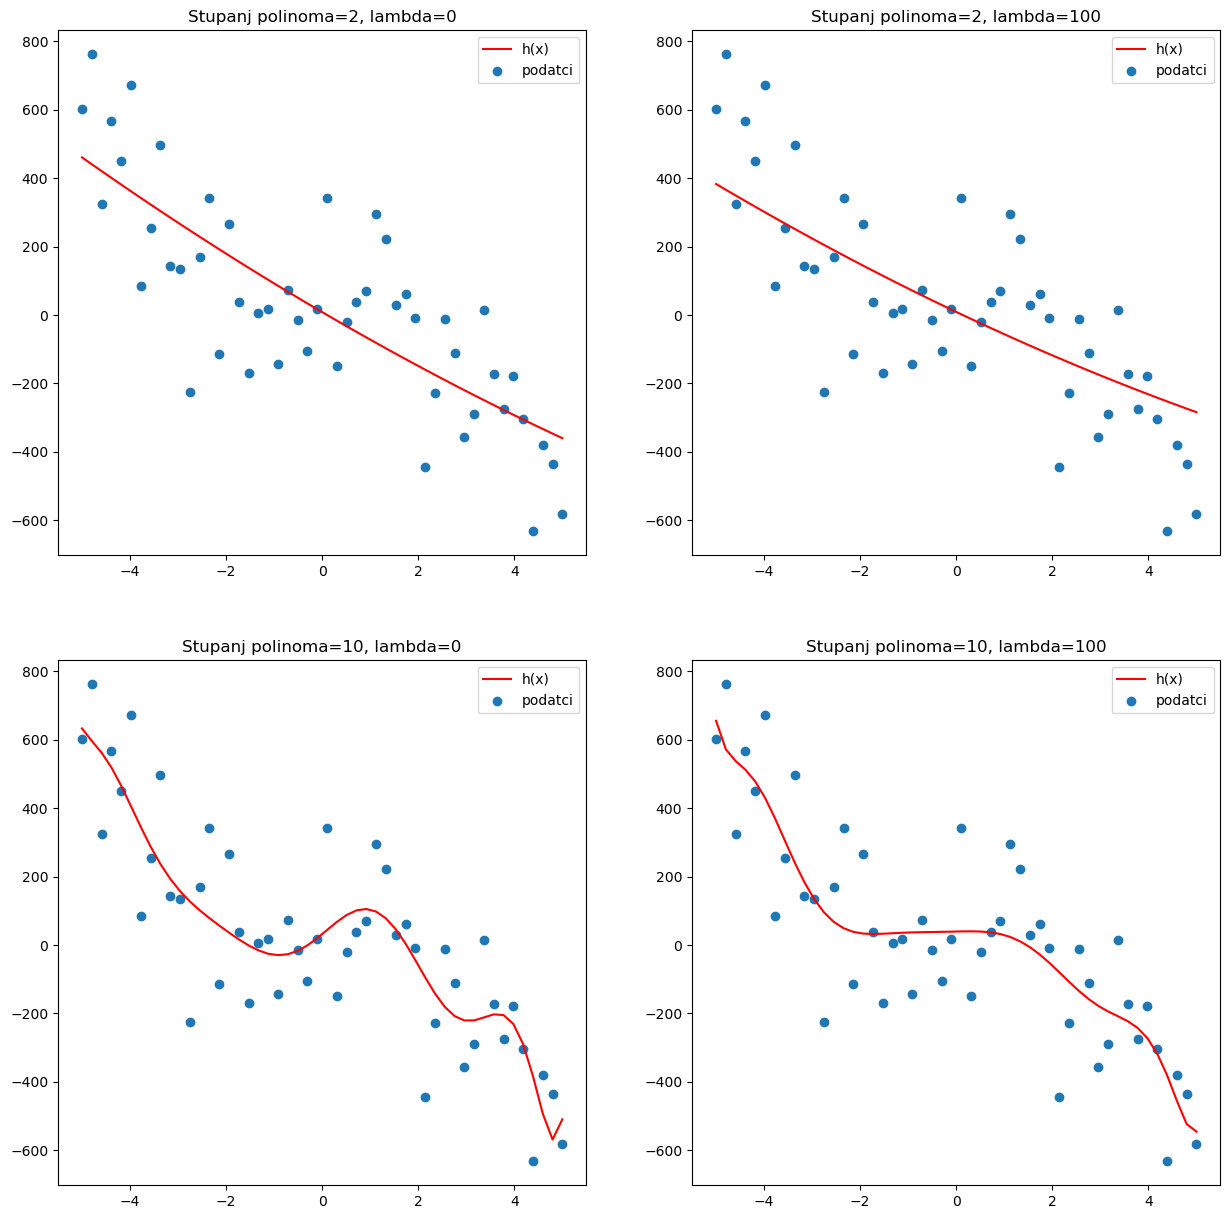

In [34]:
# Vaš kôd ovdje
lambdas = [0, 100]
degrees = [2, 10]

fig, axs = plt.subplots(2, 2, figsize=(15, 15))

for i in range(len(degrees)):
    phi = PolynomialFeatures(degree=degrees[i], include_bias=True).fit_transform(X2b)
    for l in range(len(lambdas)):
        #ridge_reg = Ridge(alpha=lambdas[l]).fit(phi, y2b)
        #h = ridge_reg.predict(phi)
        I = np.diag(np.ones(phi.shape[1]))
        I[0, 0] = 0
        w = np.linalg.inv(phi.T @ phi + lambdas[l] * I) @ phi.T @ y2b
        h = phi @ w
        axs[i, l].set_title("Stupanj polinoma=" + str(degrees[i]) + ", lambda=" + str(lambdas[l]))
        axs[i, l].plot(X2b, h, color='red', label='h(x)')
        axs[i, l].scatter(X2b, y2b, label='podatci')
        axs[i, l].legend()
        

### (d)

Kao u zadataku 3b, razdvojite primjere na skup za učenje i skup za ispitivanje u omjeru 1:1. Prikažite krivulje logaritama pogreške učenja i ispitne pogreške u ovisnosti za model $\mathcal{H}_{d=10,\lambda}$, podešavajući faktor regularizacije $\lambda$ u rasponu $\lambda\in\{0,1,\dots,50\}$.

**Q:** Kojoj strani na grafikonu odgovara područje prenaučenosti, a kojoj podnaučenosti? Zašto?
$\newline$
**A:** Desno od područja gdje je manja pogreška testiranja i veća pogreška učenja nalazi se područje podnaučenosti, zato što kada lambda -> beskonačnost onda naš model degradira u pravca, a za lambda = 0 imamo zapravo model bez izraza regularizacije.

**Q:** Koju biste vrijednosti za $\lambda$ izabrali na temelju ovih grafikona i zašto?
$\newline$
**A:** lambda=2 ili 3.

[]

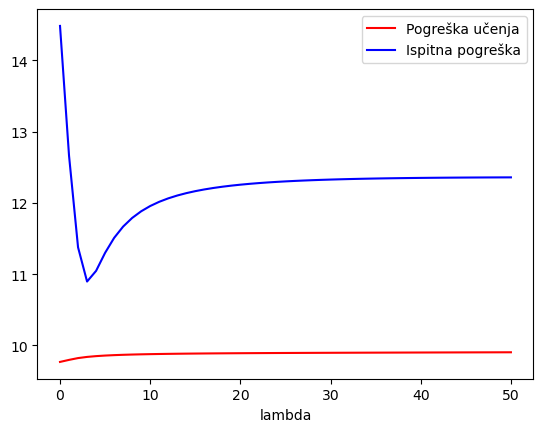

In [35]:
# Vaš kôd ovdje
X_train, X_test, y_train, y_test = train_test_split(X2b, y2b, test_size=0.5)
lambdas = np.arange(0, 51, 1)
phi_train = PolynomialFeatures(degree=10, include_bias=True).fit_transform(X_train)
phi_test = PolynomialFeatures(degree=10, include_bias=True).fit_transform(X_test)
MSE_train = []
MSE_test = []

for l in lambdas:
    ridge = Ridge(alpha=l).fit(phi_train, y_train)
    h_train = ridge.predict(phi_train)
    h_test = ridge.predict(phi_test)
    MSE_train.append(mean_squared_error(y_true=y_train, y_pred=h_train))
    MSE_test.append(mean_squared_error(y_true=y_test, y_pred=h_test))
    
plt.plot(lambdas, np.log(MSE_train), color='red', label='Pogreška učenja')
plt.plot(lambdas, np.log(MSE_test), color='blue', label='Ispitna pogreška')

plt.xlabel('lambda')
plt.legend()
plt.plot()

### 5. L1-regularizacija i L2-regularizacija

Svrha regularizacije jest potiskivanje težina modela $\mathbf{w}$ prema nuli, kako bi model bio što jednostavniji. Složenost modela može se okarakterizirati normom pripadnog vektora težina $\mathbf{w}$, i to tipično L2-normom ili L1-normom. Za jednom trenirani model možemo izračunati i broj ne-nul značajki, ili L0-normu, pomoću sljedeće funkcije koja prima vektor težina $\mathbf{w}$:

In [36]:
def nonzeroes(coef, tol=1e-6): 
    return len(coef) - len(coef[np.isclose(0, coef, atol=tol)]) 

### (a)

Za ovaj zadatak upotrijebite skup za učenje i skup za testiranje iz zadatka 3b. Trenirajte modele **L2-regularizirane** polinomijalne regresije stupnja $d=5$, mijenjajući hiperparametar $\lambda$ u rasponu $\{1,2,\dots,100\}$. Za svaki od treniranih modela izračunajte L{0,1,2}-norme vektora težina $\mathbf{w}$ te ih prikažite kao funkciju od $\lambda$. Pripazite što točno šaljete u funkciju za izračun normi.

**Q:** Objasnite oblik obiju krivulja. Hoće li krivulja za $\|\mathbf{w}\|_2$ doseći nulu? Zašto? Je li to problem? Zašto?
$\newline$
**A:** Neće, zato što za razliku L1 regularizacije izokonture funkcije L2 regularizacije su glađe, pa je vjerojatnost da će minimum ležati na nekoj od osi koordinatnog sustava manja. 

**Q:** Za $\lambda=100$, koliki je postotak težina modela jednak nuli, odnosno koliko je model rijedak?
$\newline$
**A:** Odgovor u kodu zakomentiran.

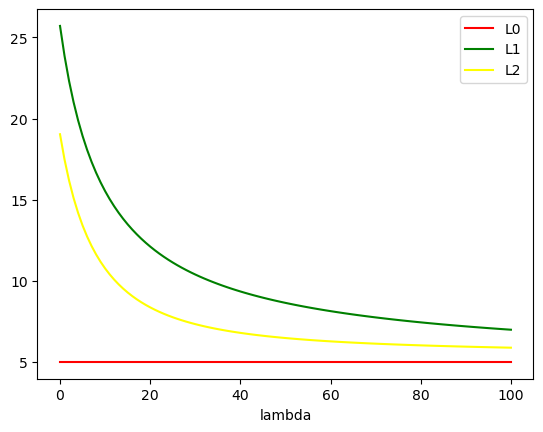

In [37]:
from sklearn.linear_model import Ridge
# Vaš kôd ovdje
d = 5
lambdas = np.arange(0, 101)
L0, L1, L2 = [], [], []
for l in lambdas:
    phi_train = PolynomialFeatures(degree=d).fit_transform(X3b_train)
    phi_test = PolynomialFeatures(degree=d).fit_transform(X3b_test)
    ridge = Ridge(alpha=l).fit(phi_train, y3b_train)
    w = ridge.coef_
    #w[0, 0] = ridge.intercept_
    L0.append(nonzeroes(w.squeeze()))
    L1.append(np.linalg.norm(w.squeeze(), ord=1))
    L2.append(np.linalg.norm(w.squeeze(), ord=2))

#print(str((1 - (L0[-1] / d)) * 100) + '%')
plt.plot(lambdas, L0, color='red', label='L0')
plt.plot(lambdas, L1, color='green', label='L1')
plt.plot(lambdas, L2, color='yellow', label='L2')
plt.xlabel('lambda')
plt.legend()

### (b)

Glavna prednost L1-regularizirane regresije (ili *LASSO regression*) nad L2-regulariziranom regresijom jest u tome što L1-regularizirana regresija rezultira **rijetkim modelima** (engl. *sparse models*), odnosno modelima kod kojih su mnoge težine pritegnute na nulu. Pokažite da je to doista tako, ponovivši gornji eksperiment s **L1-regulariziranom** regresijom, implementiranom u klasi  [`Lasso`](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Lasso.html) u modulu [`sklearn.linear_model`](http://scikit-learn.org/stable/modules/classes.html#module-sklearn.linear_model).

/home/mplinux/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1151: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  return fit_method(estimator, *args, **kwargs)
/home/mplinux/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:628: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent(
/home/mplinux/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.712e+05, tolerance: 2.514e+02 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  

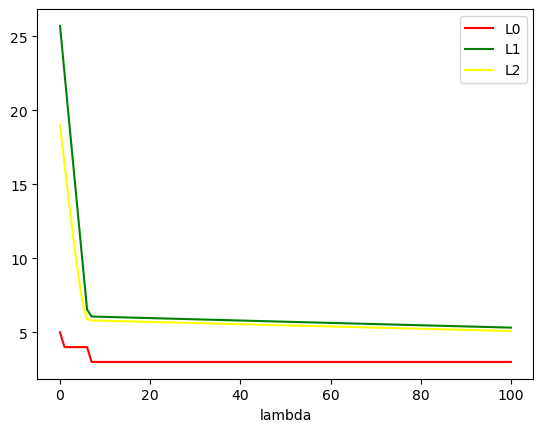

In [38]:
from sklearn.linear_model import Lasso
# Vaš kôd ovdje
L0, L1, L2 = [], [], []
for l in lambdas:
    phi_train = PolynomialFeatures(degree=d).fit_transform(X3b_train)
    phi_test = PolynomialFeatures(degree=d).fit_transform(X3b_test)
    lasso = Lasso(alpha=l).fit(phi_train, y3b_train)
    w = lasso.coef_
    #w[0] = lasso.intercept_
    L0.append(nonzeroes(w.squeeze()))
    #L0.append(np.linalg.norm(w.squeeze(), ord=0))
    L1.append(np.linalg.norm(w.squeeze(), ord=1))
    L2.append(np.linalg.norm(w.squeeze(), ord=2))

plt.plot(lambdas, L0, color='red', label='L0')
plt.plot(lambdas, L1, color='green', label='L1')
plt.plot(lambdas, L2, color='yellow', label='L2')
plt.xlabel('lambda')
plt.legend()

### 6. Značajke različitih skala

Često se u praksi možemo susreti sa podatcima u kojima sve značajke nisu jednakih magnituda. Primjer jednog takvog skupa je regresijski skup podataka `grades` u kojem se predviđa prosjek ocjena studenta na studiju (1--5) na temelju dvije značajke: bodova na prijamnom ispitu (1--3000) i prosjeka ocjena u srednjoj školi. Prosjek ocjena na studiju izračunat je kao težinska suma ove dvije značajke uz dodani šum.

Koristite sljedeći kôd kako biste generirali ovaj skup podataka.

In [48]:
n_data_points = 500
np.random.seed(69)

# Generiraj podatke o bodovima na prijamnom ispitu koristeći normalnu razdiobu i ograniči ih na interval [1, 3000].
exam_score = np.random.normal(loc=1500.0, scale = 500.0, size = n_data_points) 
exam_score = np.round(exam_score)
exam_score[exam_score > 3000] = 3000
exam_score[exam_score < 0] = 0

# Generiraj podatke o ocjenama iz srednje škole koristeći normalnu razdiobu i ograniči ih na interval [1, 5].
grade_in_highschool = np.random.normal(loc=3, scale = 2.0, size = n_data_points)
grade_in_highschool[grade_in_highschool > 5] = 5
grade_in_highschool[grade_in_highschool < 1] = 1

# Matrica dizajna.
grades_X = np.array([exam_score,grade_in_highschool]).T

# Završno, generiraj izlazne vrijednosti.
rand_noise = np.random.normal(loc=0.0, scale = 0.5, size = n_data_points)
exam_influence = 0.9
grades_y = ((exam_score / 3000.0) * (exam_influence) + (grade_in_highschool / 5.0) \
            * (1.0 - exam_influence)) * 5.0 + rand_noise
grades_y[grades_y < 1] = 1
grades_y[grades_y > 5] = 5

### a)

Iscrtajte ovisnost ciljne vrijednosti (y-os) o prvoj i o drugoj značajki (x-os). Iscrtajte dva odvojena grafa.

Text(87.59722222222221, 0.5, 'grade average')

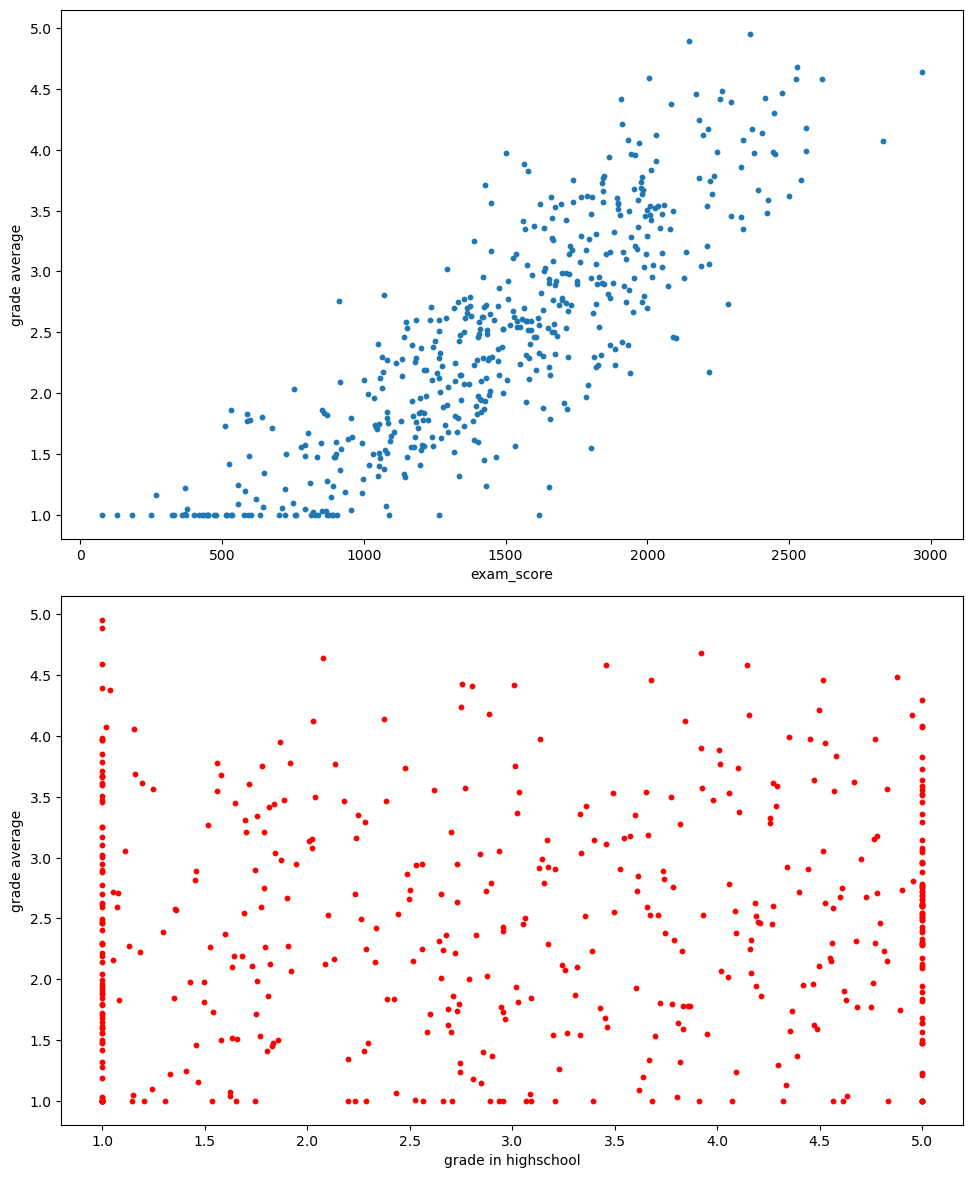

In [49]:
# Vaš kôd ovdje
fig, axs = plt.subplots(2, figsize=(10,12))
fig.tight_layout(pad=2.0) # https://www.geeksforgeeks.org/how-to-set-the-spacing-between-subplots-in-matplotlib-in-python/
axs[0].scatter(exam_score, grades_y, marker='o', s=10)
axs[0].set_xlabel('exam_score')
axs[0].set_ylabel('grade average')
axs[1].scatter(grade_in_highschool, grades_y, color='red', s=10)
axs[1].set_xlabel('grade in highschool')
axs[1].set_ylabel('grade average')

### b)

Naučite model L2-regularizirane regresije ($\lambda = 0.01$), na podacima `grades_X` i `grades_y`:

In [41]:
# Vaš kôd ovdje
phi = PolynomialFeatures(degree=1, include_bias=True).fit_transform(grades_X)
alpha = 0.01
I = np.diag(np.ones(phi.shape[1]))
I[0, 0] = 0
w = np.linalg.inv(phi.T @ phi + alpha * I) @ phi.T @ grades_y
h = phi @ w
#ridge = Ridge(alpha=0.01).fit(phi, grades_y)
#h = ridge.predict(phi)

print("w=", w)
#print("ridge_w=", ridge.intercept_, ridge.coef_)

w= [0.1506118  0.00141497 0.09477276]


Sada ponovite gornji eksperiment, ali prvo skalirajte podatke `grades_X` i `grades_y` i spremite ih u varijable `grades_X_fixed` i `grades_y_fixed`. Za tu svrhu, koristite [`StandardScaler`](http://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html).

In [42]:
from sklearn.preprocessing import StandardScaler
# Vaš kôd ovdje
scaler = StandardScaler()
grades_X_fixed = scaler.fit_transform(grades_X)
phi = PolynomialFeatures(degree=1, include_bias=True).fit_transform(grades_X_fixed)
grades_y_fixed = scaler.fit_transform(grades_y.reshape(-1, 1))

#ridge = Ridge(alpha=0.01).fit(phi, grades_y_fixed)
#h = ridge.predict(phi)

alpha = 0.01
I = np.diag(np.ones(phi.shape[1]))
I[0, 0] = 0
w = np.linalg.inv(phi.T @ phi + alpha * I) @ phi.T @ grades_y_fixed
h = phi @ w

print("w=", w)
#print("ridge_w=", ridge.intercept_, ridge.coef_)

w= [[8.50014503e-17]
 [8.16303750e-01]
 [1.51677612e-01]]


**Q:** Gledajući grafikone iz podzadatka (a), koja značajka bi trebala imati veću magnitudu, odnosno važnost pri predikciji prosjeka na studiju? Odgovaraju li težine Vašoj intuiciji? Objasnite.
$\newline$
**A:**
Veču magnitudu, odnosno važnost imaju ocjene na ispitu (pogledamo li formulu za y).


### 7. Multikolinearnost

### a)

Izradite skup podataka `grades_X_fixed_colinear` tako što ćete u skupu `grades_X_fixed` iz
zadatka *7b* duplicirati zadnji stupac (ocjenu iz srednje škole). Time smo efektivno uveli savršenu multikolinearnost.

In [43]:
# Vaš kôd ovdje
# https://stackoverflow.com/questions/36878089/add-a-column-to-numpy-2d-array
grades_X_fixed_colinear = np.hstack((grades_X_fixed, grades_X_fixed[:, 1, np.newaxis]))

Ponovno, naučite na ovom skupu L2-regularizirani model regresije ($\lambda = 0.01$).

In [44]:
# Vaš kôd ovdje
phi = PolynomialFeatures(degree=1, include_bias=True).fit_transform(grades_X_fixed_colinear)

#ridge = Ridge(alpha=0.01).fit(phi, grades_y_fixed)
#h = ridge.predict(phi)

alpha = 0.01
I = np.diag(np.ones(phi.shape[1]))
I[0, 0] = 0
w = np.linalg.inv(phi.T @ phi + alpha * I) @ phi.T @ grades_y_fixed
h = phi @ w

print("w=", w)
#print("ridge_w=", ridge.intercept_, ridge.coef_)

w= [[8.15320034e-17]
 [8.16303637e-01]
 [7.58395686e-02]
 [7.58395686e-02]]


**Q:** Usporedite iznose težina s onima koje ste dobili u zadatku *7b*. Što se dogodilo?
$\newline$
**A:**
Primjetimo da su se težine w2 i w3 prepolovile (jer 3. i 4. stupac imaju jednake vrijednosti, odnosno savršeno su multikolinearni). 

### b)

Slučajno uzorkujte 50% elemenata iz skupa `grades_X_fixed_colinear` i naučite dva modela L2-regularizirane regresije, jedan s $\lambda=0.01$ i jedan s $\lambda=1000$). Ponovite ovaj pokus 10 puta (svaki put s drugim podskupom od 50% elemenata).  Za svaki model, ispišite dobiveni vektor težina u svih 10 ponavljanja te ispišite standardnu devijaciju vrijednosti svake od težina (ukupno šest standardnih devijacija, svaka dobivena nad 10 vrijednosti).

In [45]:
# Vaš kôd ovdje
def choose_random_elements(data, perc):
    if data.shape[1] == 1:
        data = data.reshape((-1,))
        return data[np.random.choice(np.arange(len(data)), size=int(len(data) * perc), replace=False), np.newaxis]
    
    return data[np.random.choice(np.arange(len(data)), size=int(len(data) * perc), replace=False), :]
    
perc = 0.5

lambdas = [0.01, 1000]
I = np.diag(np.ones(grades_X_fixed_colinear.shape[1] + 1))
I[0, 0] = 0

w001, w100 = [], []
for i in range(10):
    grades_X_fc_subset = choose_random_elements(grades_X_fixed_colinear, perc)
    grades_y_f_subset = choose_random_elements(grades_y_fixed, perc)
    for l in lambdas:
        phi = PolynomialFeatures(degree=1, include_bias=True).fit_transform(grades_X_fc_subset)
        w = (np.linalg.inv(phi.T @ phi + l * I) @ phi.T @ grades_y_f_subset).squeeze()[1:]
        
        if l == 0.01:
            w001.append(w)
        else:
            w100.append(w)
        print("i:", i + 1, " lambda=", l, " w=", w.T)

print("w001 std.dev=", np.std(w001, axis=0))
print("w100 std.dev=", np.std(w100, axis=0))

i: 1  lambda= 0.01  w= [0.04142324 0.06846213 0.06846213]
i: 1  lambda= 1000  w= [0.00794419 0.02222916 0.02222916]
i: 2  lambda= 0.01  w= [-0.11748495  0.02278054  0.02278054]
i: 2  lambda= 1000  w= [-0.02264314  0.00535609  0.00535609]
i: 3  lambda= 0.01  w= [-0.04461037 -0.03011384 -0.03011384]
i: 3  lambda= 1000  w= [-0.01019791 -0.01065458 -0.01065458]
i: 4  lambda= 0.01  w= [ 0.09163807 -0.07379048 -0.07379048]
i: 4  lambda= 1000  w= [ 0.0162303  -0.02269061 -0.02269061]
i: 5  lambda= 0.01  w= [ 0.09380619 -0.04445912 -0.04445912]
i: 5  lambda= 1000  w= [ 0.01639144 -0.01259165 -0.01259165]
i: 6  lambda= 0.01  w= [ 0.02491446 -0.02030457 -0.02030457]
i: 6  lambda= 1000  w= [ 0.00476277 -0.0068336  -0.0068336 ]
i: 7  lambda= 0.01  w= [ 0.00021014 -0.01359296 -0.01359296]
i: 7  lambda= 1000  w= [-0.0002875  -0.00454176 -0.00454176]
i: 8  lambda= 0.01  w= [-0.05895732  0.02988111  0.02988111]
i: 8  lambda= 1000  w= [-0.01045148  0.00861084  0.00861084]
i: 9  lambda= 0.01  w= [0.0811

**Q:** Kako regularizacija utječe na stabilnost težina?
$\newline$
**A:**
Popravlja stabilnost matrice tako što značajke čini manje međusobno kolinearnima.
**Q:** Jesu li koeficijenti jednakih magnituda kao u prethodnom pokusu? Objasnite zašto.
$\newline$
**A:** Ne, nisu, zbog dodavanja koeficijenta regularizacije na dijagonalu.